<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/CNN_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

## Loading Data

In [6]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 46% 7.00M/15.1M [00:00<00:00, 70.7MB/s]
100% 15.1M/15.1M [00:00<00:00, 110MB/s] 


In [7]:
# Unzipping the file
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

In [8]:
# List folders
!ls /content/brain_tumor_dataset

no  yes


In [9]:
#Checking for the total number of values per folder
import os
yes = len(os.listdir('brain_tumor_dataset/yes'))
no = len(os.listdir('brain_tumor_dataset/no'))

print(yes, no)

155 98


In [10]:
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = os.path.join(target_dir, target_class)

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read the images and plot it with plt
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

Image shape: (336, 300)


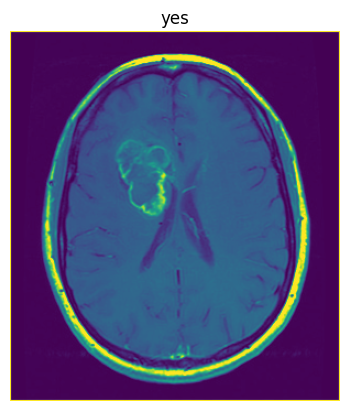

In [11]:
#View a ra random image from the dataset
img = view_random_image('/content/brain_tumor_dataset', target_class='yes')

Image shape: (225, 225, 3)


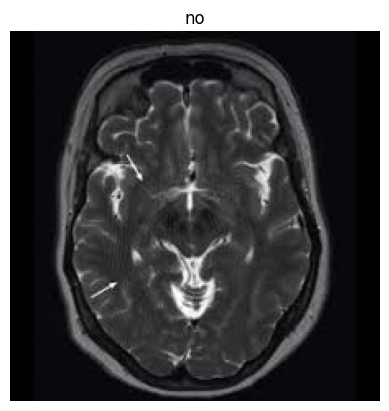

In [12]:
#View a ra random image form the dataset
img = view_random_image('/content/brain_tumor_dataset', target_class='no')

## Train-Test Split

In [13]:
# Import required libraries
import os       # For interacting with the file system (e.g., creating directories, listing files)
import shutil   # For copying files from one directory to another
import random   # For shuffling file lists to ensure randomness

def split_dataset_simple(dataset_dir, output_dir, train_ratio=0.8):
    """
    Splits a dataset into train and test folders.

    Parameters:
        dataset_dir (str): Path to the main dataset folder with class subfolders.
        output_dir (str): Path to save the split dataset.
        train_ratio (float): Percentage of data for training (default is 80% training, 20% testing).
    """

    # Create train and test directories inside the output directory
    train_dir = os.path.join(output_dir, 'train')  # Path for the train folder
    test_dir = os.path.join(output_dir, 'test')    # Path for the test folder
    os.makedirs(train_dir, exist_ok=True)          # Create the train folder if it doesn't exist
    os.makedirs(test_dir, exist_ok=True)           # Create the test folder if it doesn't exist

    # Loop through each class folder inside the dataset directory
    for class_name in os.listdir('brain_tumor_dataset'):  # List all items in the dataset directory
        class_path = os.path.join('brain_tumor_dataset', class_name)  # Full path to the current class folder

        # Skip the item if it's not a folder (e.g., skip files)
        if not os.path.isdir(class_path):
            continue

        # Create subfolders for this class in the train and test directories
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # List all files in the current class folder
        files = os.listdir(class_path)  # Get all files (e.g., images) in the class folder
        random.shuffle(files)           # Randomize the order of the files

        # Split the files into training and testing sets
        split_index = int(len(files) * train_ratio)  # Calculate how many files go to the training set
        train_files = files[:split_index]           # First portion goes to training
        test_files = files[split_index:]            # Remaining portion goes to testing

        # Copy the training files to the corresponding train subfolder
        for file_name in train_files:
            # Full path to the file in the original dataset
            src_path = os.path.join(class_path, file_name)
            # Destination path in the train folder
            dest_path = os.path.join(train_dir, class_name, file_name)
            shutil.copy(src_path, dest_path)  # Copy the file

        # Copy the testing files to the corresponding test subfolder
        for file_name in test_files:
            # Full path to the file in the original dataset
            src_path = os.path.join(class_path, file_name)
            # Destination path in the test folder
            dest_path = os.path.join(test_dir, class_name, file_name)
            shutil.copy(src_path, dest_path)  # Copy the file

    # Print a success message after all files are split
    print("Dataset split successfully!")

# Example usage of the function
split_dataset_simple("dataset", "output_dataset", train_ratio=0.8)

Dataset split successfully!


## Preprocessing the dataset

In [14]:
train= len(os.listdir("/content/output_dataset/train/yes")) + len(os.listdir("/content/output_dataset/train/no"))
train

202

In [15]:
test= len(os.listdir("/content/output_dataset/test/yes")) + len(os.listdir("/content/output_dataset/test/no"))
test

51

In [16]:
#Prepocessing the train dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Data Generator with Augmentation
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.2,
    width_shift_range =0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    '/content/output_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)




Found 202 images belonging to 2 classes.


Found 202 images belonging to 2 classes.


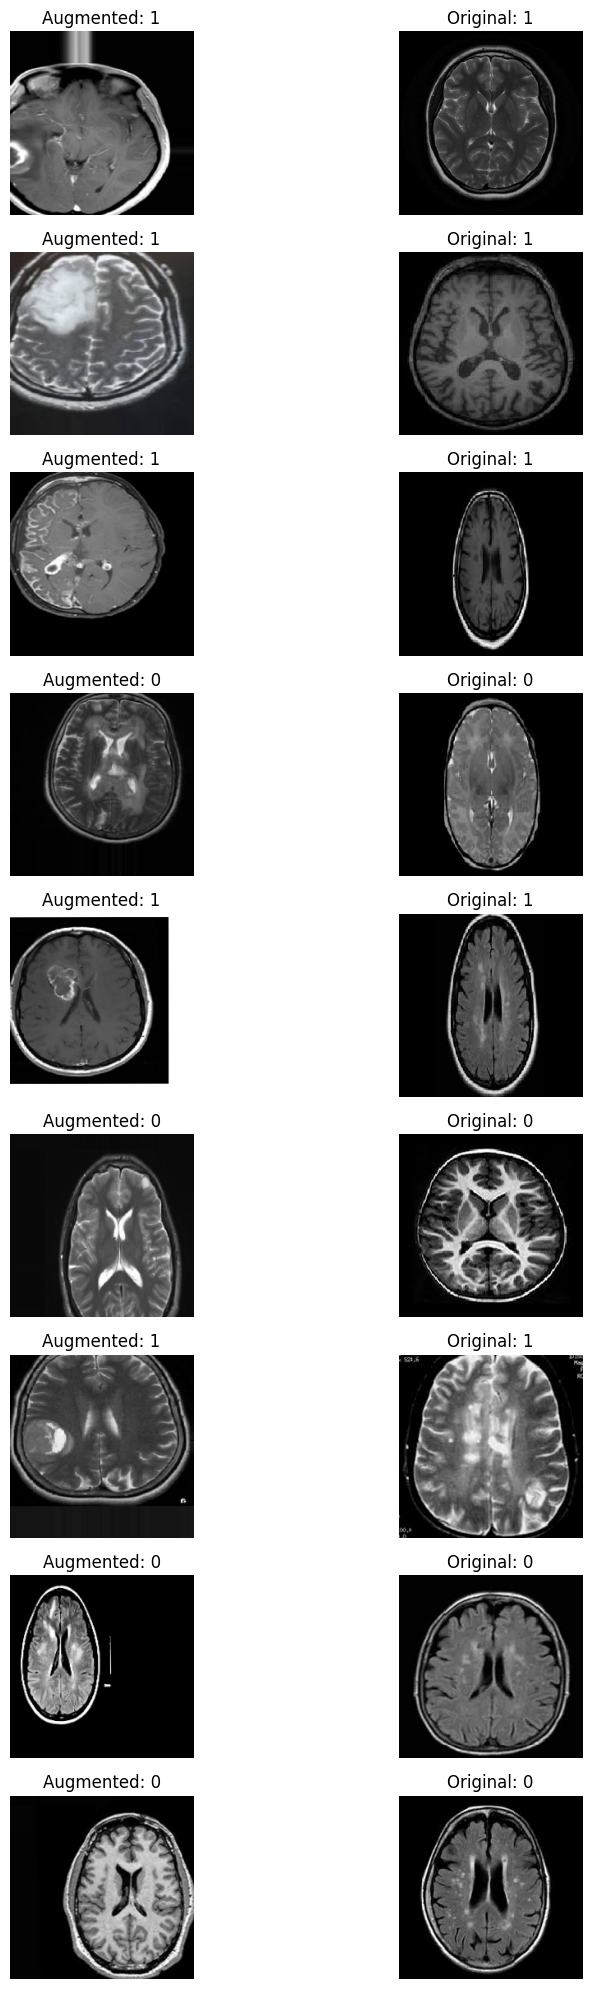

In [17]:
import matplotlib.pyplot as plt
import numpy as np

imgs, labels = next(train_data)

# Assuming 'imgs' contains the augmented images

# Get a batch of original images (without augmentation)
original_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for originals
original_data = original_datagen.flow_from_directory(
    '/content/output_dataset/train',  # Same directory as augmented images
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order consistent
)
original_imgs, _ = next(original_data)

# Display augmented and original images side-by-side
fig, axes = plt.subplots(9, 2, figsize=(10, 20))  # 9 rows, 2 columns for comparison

for i in range(9):
    # Augmented image
    axes[i, 0].imshow(imgs[i])
    axes[i, 0].set_title(f"Augmented: {np.argmax(labels[i])}")
    axes[i, 0].axis('off')

    # Original image
    axes[i, 1].imshow(original_imgs[i])
    axes[i, 1].set_title(f"Original: {np.argmax(labels[i])}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [18]:
#Preprocessing the test dataset
# Initialize the ImageDataGenerator without any augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/output_dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 51 images belonging to 2 classes.


## Building CNN Model

In [19]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile and train the model
model.compile(optimizer = 'adam',
              loss = 'CategoricalCrossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6219 - loss: 1.7078 - val_accuracy: 0.4902 - val_loss: 0.6852
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5803 - loss: 0.6725 - val_accuracy: 0.6078 - val_loss: 0.6473
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6470 - loss: 0.6248 - val_accuracy: 0.8235 - val_loss: 0.4712
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6562 - loss: 0.6595 - val_accuracy: 0.8039 - val_loss: 0.5732
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6371 - loss: 0.6704 - val_accuracy: 0.7255 - val_loss: 0.6044
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.6832 - loss: 0.6287 - val_accuracy: 0.8039 - val_loss: 0.4881
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.6587 - loss: 0.6052 - val_accuracy: 0.8627 - val_loss: 0.4055
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.7220 - loss: 0.5878 - val_accuracy: 0.6667 - val_loss: 0.5663
Epoch 9/20
7/7 ━━━━

## Evaluate the Model

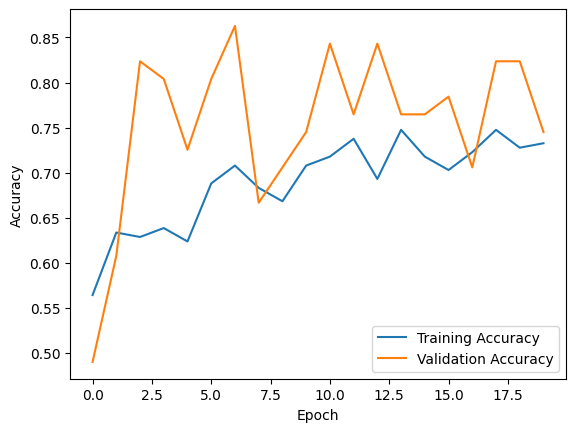

In [23]:
#Evalauting the model using a graph for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

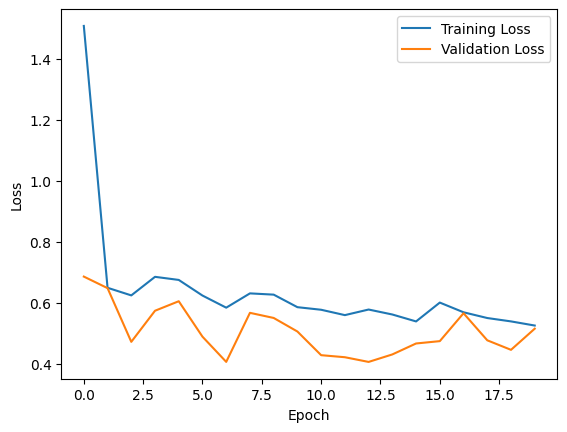

In [24]:
#Evalauting the model using a graph for loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
